In [27]:
import pandas as pd
import numpy as np
import sklearn.decomposition as skd
from optimization import optimize_portfolio

sp500_df = pd.read_csv('sp500.csv')
sp500_df_price = pd.read_csv('sp500_price.csv')
sp500_df_price.set_index('date', inplace=True)

sp500_df.set_index('date', inplace=True)
#make sure the index is the same
sp500_df_price = sp500_df_price[sp500_df_price.index.isin(sp500_df.index)]
# print(sp500_df.head())
sp500_df = sp500_df.pct_change()
sp500_df.dropna(inplace=True)
changes = sp500_df.values
sp500_changes = sp500_df_price.pct_change()
sp500_changes.dropna(inplace=True)
sp500_changes = sp500_changes.values
#split into train and test
train = changes[:int(changes.shape[0]*0.8)]
test = changes[int(changes.shape[0]*0.8):]
sp500_train = sp500_changes[:int(changes.shape[0]*0.8)]
sp500_test = sp500_changes[int(changes.shape[0]*0.8):]

In [28]:
import matplotlib.pyplot as plt

In [29]:
#load cluster weights


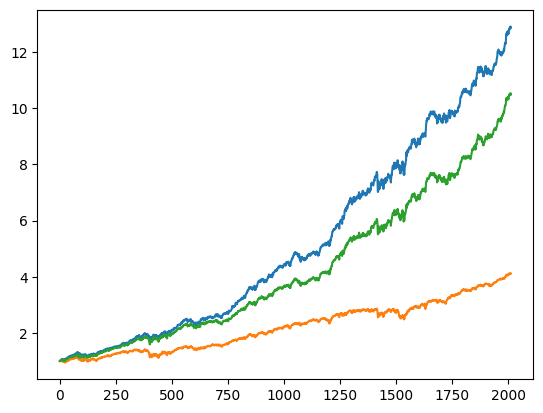

In [30]:
naive_weights = np.load('weights/naive.npy')
kerenel_weights = np.load('runs/naiveKernel/weights.npz')['arr_0']
cluster_weights = np.load('weights/cluster_overall_weights.npy')
plt.plot(np.cumprod(1+train@naive_weights))
plt.plot(np.cumprod(1+train@kerenel_weights))
plt.plot(np.cumprod(1+train@cluster_weights))

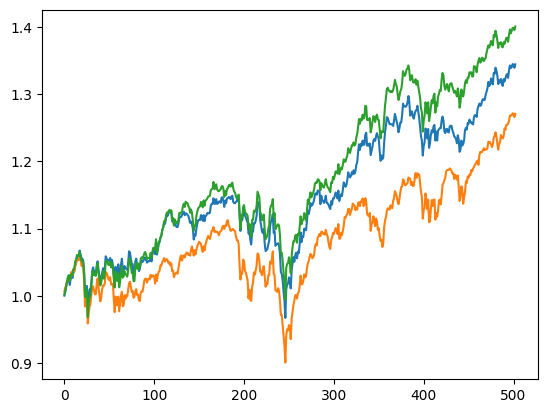

In [35]:
plt.plot(np.cumprod(1+test@naive_weights))
plt.plot(np.cumprod(1+test@kerenel_weights))
plt.plot(np.cumprod(1+test@cluster_weights))

In [32]:
print("shape ratio SP500: ", np.mean(sp500_train)/np.std(sp500_train)*np.sqrt(252))
print("shape ratio naive: ", np.mean(train@naive_weights)/np.std(train@naive_weights)*np.sqrt(252))
print("shape ratio kernel: ", np.mean(train@kerenel_weights)/np.std(train@kerenel_weights)*np.sqrt(252))
print("shape ratio cluster: ", np.mean(train@cluster_weights)/np.std(train@cluster_weights)*np.sqrt(252))

shape ratio SP500:  0.8045079617499685
shape ratio naive:  2.266345377549489
shape ratio kernel:  1.2015700361117534
shape ratio cluster:  2.1689611523161747


In [33]:
print("sharpe ratio test SP500: ", np.mean(sp500_test)/np.std(sp500_test)*np.sqrt(252))
print("sharpe ratio test naive: ", np.mean(test@naive_weights)/np.std(test@naive_weights)*np.sqrt(252))
print("sharpe ratio test kernel: ", np.mean(test@kerenel_weights)/np.std(test@kerenel_weights)*np.sqrt(252))
print("sharpe ratio test cluster: ", np.mean(test@cluster_weights)/np.std(test@cluster_weights)*np.sqrt(252))

sharpe ratio test SP500:  0.7099693617873225
sharpe ratio test naive:  1.199754125583714
sharpe ratio test kernel:  0.9201251688287962
sharpe ratio test cluster:  1.3170570245287723


In [34]:
kerenel_weights.max()

0.0023364485981308414

In [22]:
naive_weights.max()

0.14695163760422378